# Linear Regression

In [1]:
# Common imports
import numpy as np
import pandas as pd

In [2]:
housing = pd.read_csv("datasets/House.txt", header = None, names=['Size', 'Bedrooms', 'Price'])
housing.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
Size        47 non-null int64
Bedrooms    47 non-null int64
Price       47 non-null int64
dtypes: int64(3)
memory usage: 1.2 KB


In [4]:
housing.describe()

,Size,Bedrooms,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8ee38ca210>,
      dtype=object)

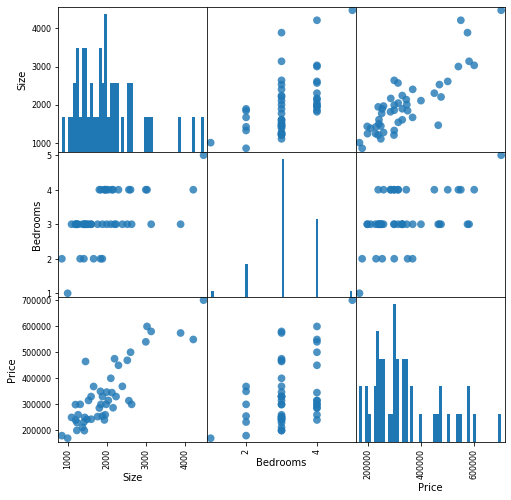

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
pd.plotting.scatter_matrix(housing, figsize=(8, 8),
                           marker='o', hist_kwds={'bins': 50}, s=60,
                           alpha=.8)

In [6]:
X = housing[["Size"]]

In [7]:
X.shape

(47, 1)

In [8]:
y = housing.Price

In [9]:
y.shape

(47,)

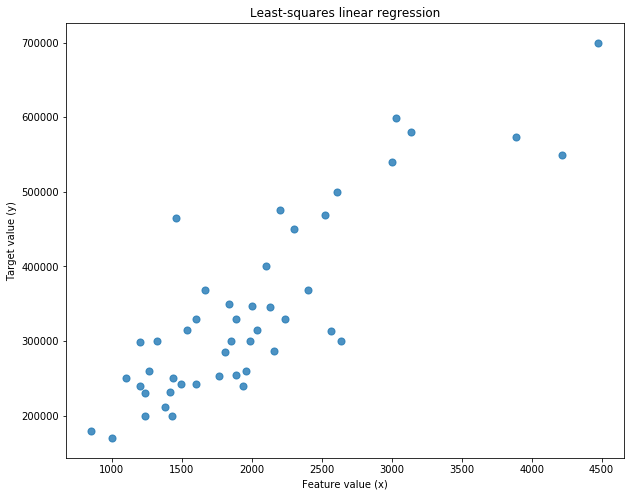

In [10]:
plt.figure(figsize=(10,8))
plt.scatter(X, y, marker= 'o', s=50, alpha=0.8)
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()

In [11]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression().fit(X, y)

In [12]:
print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score: {:.3f}'
     .format(linreg.score(X, y)))

linear model coeff (w): [134.52528772]
linear model intercept (b): 71270.492
R-squared score: 0.731


In [13]:
X_new = [[3000]]

In [14]:
linreg.predict(X_new)

array([474846.35560945])

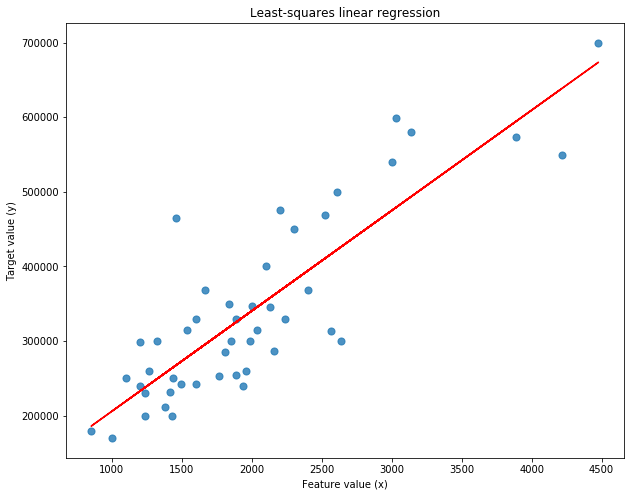

In [15]:
plt.figure(figsize=(10,8))
plt.scatter(X, y, marker= 'o', s=50, alpha=0.8)
plt.plot(X, linreg.coef_ * X + linreg.intercept_, 'r-')
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()

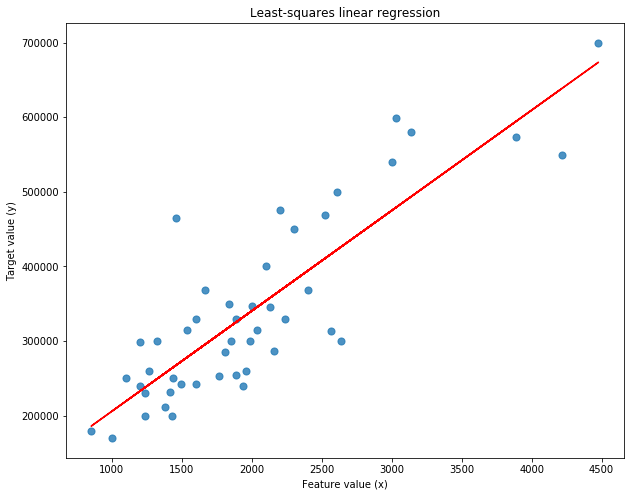

In [16]:
plt.figure(figsize=(10,8))
plt.scatter(X, y, marker= 'o', s=50, alpha=0.8)
plt.plot(X, linreg.predict(X), 'r-')
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()

In [17]:
from sklearn.metrics import mean_squared_error

housing_predictions = linreg.predict(X)
lin_mse = mean_squared_error(y, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

64158.12872010906

In [18]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y, housing_predictions)
lin_mae

52004.81399860769

In [19]:
from sklearn.preprocessing import PolynomialFeatures

poly3 = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly3.fit_transform(X)
X_poly

array([[2.10400000e+03, 4.42681600e+06, 9.31402086e+09],
       [1.60000000e+03, 2.56000000e+06, 4.09600000e+09],
       [2.40000000e+03, 5.76000000e+06, 1.38240000e+10],
       [1.41600000e+03, 2.00505600e+06, 2.83915930e+09],
       [3.00000000e+03, 9.00000000e+06, 2.70000000e+10],
       [1.98500000e+03, 3.94022500e+06, 7.82134662e+09],
       [1.53400000e+03, 2.35315600e+06, 3.60974130e+09],
       [1.42700000e+03, 2.03632900e+06, 2.90584148e+09],
       [1.38000000e+03, 1.90440000e+06, 2.62807200e+09],
       [1.49400000e+03, 2.23203600e+06, 3.33466178e+09],
       [1.94000000e+03, 3.76360000e+06, 7.30138400e+09],
       [2.00000000e+03, 4.00000000e+06, 8.00000000e+09],
       [1.89000000e+03, 3.57210000e+06, 6.75126900e+09],
       [4.47800000e+03, 2.00524840e+07, 8.97950234e+10],
       [1.26800000e+03, 1.60782400e+06, 2.03872083e+09],
       [2.30000000e+03, 5.29000000e+06, 1.21670000e+10],
       [1.32000000e+03, 1.74240000e+06, 2.29996800e+09],
       [1.23600000e+03, 1.52769

In [20]:
linreg2 = LinearRegression().fit(X_poly, y)

In [21]:
print('linear model coeff (w): {}'
     .format(linreg2.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg2.intercept_))
print('R-squared score: {:.3f}'
     .format(linreg2.score(X_poly, y)))

linear model coeff (w): [-1.07855433e+02  1.06190390e-01 -1.38299982e-05]
linear model intercept (b): 236407.036
R-squared score: 0.738


In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

pipeline_reg = Pipeline([('poly', poly3), ('scal', scaler), ('lin', linreg)])
pipeline_reg.fit(X, y)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=3, include_bias=False,
                                    interaction_only=False, order='C')),
                ('scal',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lin',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

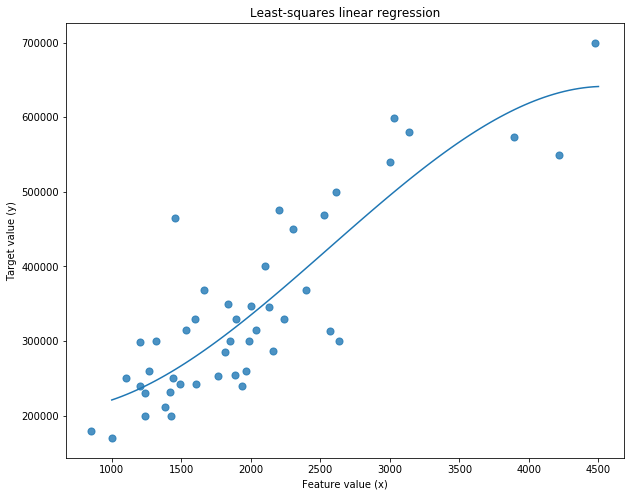

In [23]:
plt.figure(figsize=(10,8))
plt.scatter(X, y, marker= 'o', s=50, alpha=0.8)
X1 = np.linspace(1000, 4500, 100)
curve = pipeline_reg.predict(X1[:, np.newaxis])
plt.plot(X1, curve)
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()

R-squared score: 0.789


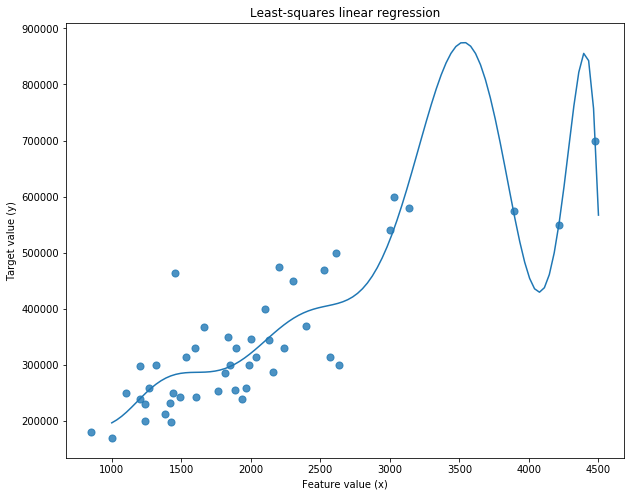

In [24]:
poly10 = PolynomialFeatures(degree=10, include_bias=False)
scaler = StandardScaler()
lin_reg2 = LinearRegression()

pipeline_reg = Pipeline([('poly', poly10), ('scal', scaler), ('lin', lin_reg2)])
pipeline_reg.fit(X, y)

print('R-squared score: {:.3f}'
     .format(pipeline_reg.score(X, y)))

plt.figure(figsize=(10,8))
plt.scatter(X, y, marker= 'o', s=50, alpha=0.8)

X1 = np.linspace(1000, 4500, 100)
curve = pipeline_reg.predict(X1[:, np.newaxis])
plt.plot(X1, curve)

plt.title('Least-squares linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0)

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(PolynomialFeatures(), StandardScaler(),LinearRegression())
param_grid = {'polynomialfeatures__degree': range(1,10)}

grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1,return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('polynomialfeatures',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('linearregression',
                                        LinearRegression(copy_X=True,
                                                         fit_intercept=True,
                                                         n_jobs=None,
           

In [27]:
df_grid = pd.DataFrame(grid.cv_results_)
df_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_polynomialfeatures__degree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005336,0.000559,0.002007,0.000198,1,{'polynomialfeatures__degree': 1},-0.723992,0.867068,0.818599,0.853010,...,0.512328,0.619555,1,0.854966,0.669916,0.714149,0.711040,0.726891,0.735392,0.062772
1,0.004037,0.000348,0.002541,0.001772,2,{'polynomialfeatures__degree': 2},-0.717951,0.862138,0.750534,0.863544,...,0.478220,0.604111,2,0.854979,0.669998,0.727116,0.712918,0.750267,0.743056,0.061772
2,0.007416,0.002893,0.003634,0.003864,3,{'polynomialfeatures__degree': 3},-0.791496,0.769845,0.749826,0.864037,...,0.435328,0.619989,4,0.859067,0.679721,0.727491,0.712924,0.755843,0.747009,0.061164
3,0.004109,0.000861,0.002676,0.001195,4,{'polynomialfeatures__degree': 4},-0.849768,0.224321,0.690244,0.863572,...,0.302272,0.612806,6,0.860222,0.705952,0.733226,0.713374,0.755970,0.753748,0.055995
4,0.005218,0.003220,0.001653,0.000029,5,{'polynomialfeatures__degree': 5},-1.114811,0.533122,0.776586,0.880685,...,0.344997,0.739232,5,0.902149,0.708523,0.755324,0.740356,0.758949,0.773060,0.066951
5,0.004640,0.001962,0.002222,0.001000,6,{'polynomialfeatures__degree': 6},-0.940265,0.908956,0.832567,0.869843,...,0.474673,0.710872,3,0.914946,0.719592,0.768026,0.761535,0.763675,0.785555,0.067017
6,0.004077,0.000774,0.001671,0.000055,7,{'polynomialfeatures__degree': 7},-1.019460,-5.858813,0.088048,-0.356287,...,-1.387696,2.276596,7,0.916415,0.731400,0.775563,0.778905,0.768579,0.794172,0.063432
7,0.003740,0.000101,0.002166,0.000925,8,{'polynomialfeatures__degree': 8},-0.924715,-511.369999,-52.481350,-17.894188,...,-121.528189,195.628554,8,0.916924,0.757669,0.798109,0.792865,0.818342,0.816782,0.053751
8,0.005197,0.001075,0.001717,0.000214,9,{'polynomialfeatures__degree': 9},-2.533707,-28795.299911,-2202.249669,-696.434822,...,-6342.113547,11255.153527,9,0.920297,0.803296,0.830079,0.820760,0.826116,0.840110,0.041125


In [28]:
print("Score with poly features: {:.2f}".format(grid.score(X_test, y_test)))

Score with poly features: 0.66


## Using both Size and Bedrooms as features

In [29]:
X = housing[["Size","Bedrooms"]]

In [30]:
X.shape

(47, 2)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0)

In [32]:
pipe = make_pipeline(PolynomialFeatures(), StandardScaler(),LinearRegression())
param_grid = {'polynomialfeatures__degree': range(1,10)}

grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1,return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('polynomialfeatures',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('linearregression',
                                        LinearRegression(copy_X=True,
                                                         fit_intercept=True,
                                                         n_jobs=None,
           

In [33]:
df_grid = pd.DataFrame(grid.cv_results_)
df_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_polynomialfeatures__degree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004237,0.000362,0.001950,0.000280,1,{'polynomialfeatures__degree': 1},-8.204689e-01,8.506722e-01,8.134016e-01,8.538627e-01,...,4.889328e-01,6.558265e-01,1,0.857734,0.674784,0.714997,0.711121,0.726894,0.737106,0.062775
1,0.004172,0.000671,0.001541,0.000281,2,{'polynomialfeatures__degree': 2},-1.031234e+00,7.620897e-01,7.300283e-01,2.202841e-01,...,2.568335e-01,6.722326e-01,2,0.879042,0.703610,0.741765,0.753294,0.760776,0.767697,0.059047
2,0.003557,0.000112,0.001597,0.000040,3,{'polynomialfeatures__degree': 3},-1.153439e+00,-5.038197e-01,-7.239624e+00,-1.190932e+01,...,-4.072455e+00,4.756067e+00,3,0.903822,0.774165,0.819209,0.820101,0.808462,0.825152,0.042727
3,0.004174,0.000782,0.001785,0.000238,4,{'polynomialfeatures__degree': 4},-5.851855e-01,-3.719491e+01,-6.297802e-01,-4.887213e+01,...,-1.840131e+01,2.050350e+01,4,0.937868,0.831931,0.831366,0.831403,0.845929,0.855699,0.041460
4,0.003743,0.000180,0.001557,0.000273,5,{'polynomialfeatures__degree': 5},-2.505531e+00,-8.772106e+02,-6.878596e+03,-4.374917e+02,...,-1.640083e+03,2.639191e+03,5,0.944788,0.842550,0.856839,0.846369,0.846037,0.867317,0.039030
5,0.003823,0.000034,0.003235,0.003086,6,{'polynomialfeatures__degree': 6},-2.587872e+02,-1.587509e+04,-4.892915e+08,-1.428847e+05,...,-9.789069e+07,1.957004e+08,6,0.974842,0.848310,0.879708,0.856378,0.859160,0.883679,0.046742
6,0.003542,0.000578,0.001630,0.000367,7,{'polynomialfeatures__degree': 7},-2.417269e+03,-6.766899e+04,-8.104193e+08,-2.257032e+06,...,-1.677886e+08,3.214672e+08,7,0.978769,0.849011,0.882730,0.857021,0.861737,0.885854,0.047777
7,0.003604,0.000592,0.001617,0.000298,8,{'polynomialfeatures__degree': 8},-3.497950e+04,-1.208679e+11,-1.297844e+09,-5.687590e+09,...,-2.557523e+10,4.769195e+10,8,0.986023,0.865789,0.882744,0.892527,0.866069,0.898630,0.044869
8,0.004098,0.000504,0.002247,0.000762,9,{'polynomialfeatures__degree': 9},-3.593583e+06,-1.531240e+11,-4.533819e+10,-1.473644e+10,...,-4.264419e+10,5.766635e+10,9,0.993194,0.868192,0.912035,0.892627,0.897921,0.912794,0.042619


In [34]:
print("Score with poly features: {:.2f}".format(grid.score(X_test, y_test)))

Score with poly features: 0.65
